# Reading and plotting with Iris

## Synopsis

- Use Iris to read and plot spherical data in only a few lines

## Iris

We now turn to the package __Iris__ whose documentation you can find at https://scitools.org.uk/iris/docs/latest/.

Install with
```bash
conda install -c conda-forge iris
```
although you should check their documentation for other dependencies such as cartopy (we've used the critical ones in earlier notebooks so if you've been following along you should be alright).

Here's the usual import cell which imports both `iris` and some plotting modules provided within Iris:

In [1]:
import iris
import iris.plot
import iris.quickplot
import cartopy.crs
import matplotlib.pyplot as plt

In terms of what we've already covered, Iris plays the role of the netCDF4 and matplotlib.pyplot packages combined, much like xarray. It allows us to open a dataset and plot it with minimal intermediate steps.

First, we'll open the same dataset that we accessed before using `netCDF4.Dataset()` and `xarray.open_dataset()` but this time with `iris.load_cube()`:

In [2]:
tos = iris.load_cube('http://esgf-data2.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/CMIP/MIROC/MIROC6/1pctCO2/r1i1p1f1/Omon/tos/gn/v20181212/tos_Omon_MIROC6_1pctCO2_r1i1p1f1_gn_330001-334912.nc')

C:\Users\ajadc\Miniconda3\envs\py3\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'tos'
  warnings.warn(message % (variable_name, nc_var_name))


If you see pink-background warnings, don't worry - that's because Iris sees a reference to a variable (_areacello_) that is in a different file/location. The dataset, or more precisely the "cube of data" was opened.

Note: we used `iris.load_cube()` but there is also an `iris.load()`. `iris.load()` loads a dataset, more like `xarray.open_dataset()` and would have returned a list with one element corresponding to the result of `iris.load_cube()`.

In [3]:
tos

<iris 'Cube' of sea_surface_temperature / (degC) (time: 600; -- : 256; -- : 360)>

This is the same information that we saw with netCDF4.Dataset or xarray.Dataset objects and is nicely displayed (if we had used `print(tos)` we would see an ascii form of the above html).

Notice that the coordinates are indicated as 2D and there is no mention of the 1D spatial dimension variables. This is great because it means Iris has properly interpreted the metadata following the CF convention and knows that the data resides an a non-trivial grid.

Do we still have to use cartopy (as with netCDF4 or xarray) to handle spherical coordinates?

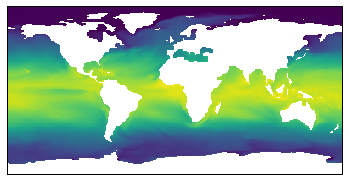

In [4]:
iris.plot.pcolormesh( tos[0] );

This has plotted things correctly and seems to be in a Plate-Carree (lat-lon) projection. Notice that this call to pcolormesh() did not add labels or a colorbar automatically. For that, Iris provide an alternative to their _plot_ module called _quickplot_. Here's an examples also using a different cartopy projection.

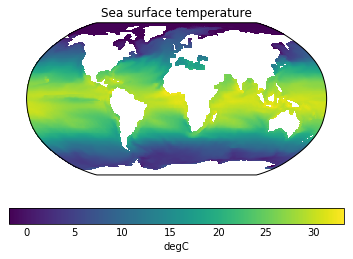

In [5]:
ax = plt.axes(projection=cartopy.crs.Robinson());
iris.quickplot.pcolormesh( tos[0] );

Unlike xarray, the time of the dataset was not added to the title but otherwise the plot is fairly complete and useful.

Notice that the `transform=` argument to `pcolormesh()` is not needed because Iris provides that information for you.

As a last test, let's see if Iris knows about the finite-volume nature of the data and can plot the Arctic properly without a seam...

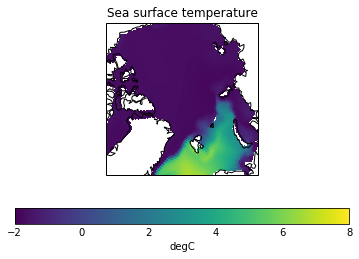

In [6]:
ax = plt.axes(projection=cartopy.crs.NorthPolarStereo());
iris.quickplot.pcolormesh( tos[0], vmin=-2, vmax=8 );
w=2e6; plt.xlim(-w,w); plt.ylim(-w,w); # Zoom into Arctic
plt.gca().coastlines();

## Summary

- Iris is a high-level layer that understands the CF convention in netCDF files.
- Iris can plot ocean-model data correctly out-of-the-box!